## 0. Introduction

The purpose of this notebook is to explore Generalized Autoregressive Conditional Heteroskedasticity $(\text{GARCH})$ models with reference to chapter 6 from *Applied Time Series Analysis and Forecasting with Python* (Huang \& Petukhina, 2022).

## 1. Features of Financial Returns Series

> Fat (heavy) tails: The distribution density function of returns often has fatter (heavier) tails than the tails of the corresponding normal distribution density.

> $\text{ARCH}$ effect: Although the return series can often be seen as a white noise, its squared (and absolute) series may usually be autocorrelated, and these autocorrelations are hardly negative.

> Volatility clustering: Large changes in returns tend to cluster in time, and small changes tend to be followed by small changes.

> Asymmetry: The distribution of asset returns is slightly negatively skewed. One possible explanation could be that traders react more strongly to unfavourable information than favourable information.

## 2. ARCH Models

Autoregressive Conditional Heteroskedasticity $(\text{ARCH})$ models can capture some of the features of financial returns series outlined above. 

An $\text{ARCH}(p)$ model with order $p \geq 1$ is of the form,

$$
\begin{cases}
X_t = \sigma_t \varepsilon_t \\
\sigma_t^2 = \omega + \alpha_1 X_{t-1}^2 + \alpha_2 X_{t-2}^2 + \cdots + \alpha_p X_{t-p}^2, \tag{2.1}
\end{cases}
$$

where $ \omega \geq 0 $, $ \alpha_i \geq 0 $, and $ \alpha_p > 0 $ are constants, $ \varepsilon_t \sim \text{iid}(0, 1) $, and $ \varepsilon_t $ is independent of $ \{X_k; k \leq t - 1\} $. A stochastic process $ X_t $ is called an $\text{ARCH}(p)$ process if it satisfies equation 2.1.

By definition, $\sigma_t^2$ (and $\sigma_t$) is independent of $\varepsilon$. Besides, usually it is further assumed that $\varepsilon_t \sim N(0, 1)$. Sometimes, however, we need to further suppose that $\varepsilon_t$ follows a standardized (skew) Student’s T distribution or a generalized error distribution in order to capture more features of a financial time series.

Let $\mathcal{F}_s $ denote the information set generated by $\{X_k; k \leq s\}$, namely, the sigma field $\sigma (X_k; k \leq s)$. It is easy to see that $\mathcal{F}_s$ is independent of $\varepsilon_t$ for any $s < t$. According to equation 2.1 and the properties of the conditional mathematical expectation, we have that

$$
\mathbb{E}(X_t \mid \mathcal{F}_{t-1}) = \mathbb{E}(\sigma_t \varepsilon_t \mid \mathcal{F}_{t-1}) = \sigma_t \mathbb{E}(\varepsilon_t \mid \mathcal{F}_{t-1}) = \sigma_t \mathbb{E}(\varepsilon_t) = 0, \tag{2.2}
$$

and

$$ 
\text{Var}(X_t^2 \mid \mathcal{F}_{t-1}) = \mathbb{E}(X_t^2 \mid \mathcal{F}_{t-1}) = \mathbb{E}(\sigma_t^2 \varepsilon_t^2 \mid \mathcal{F}_{t-1}) = \sigma_t^2 \mathbb{E}(\varepsilon_t^2 \mid \mathcal{F}_{t-1}) = \sigma_t^2 \mathbb{E}(\varepsilon_t^2) = \sigma_t^2. 
$$

This implies that $\sigma_t^2$ is the conditional variance of $X_t$ and it evolves according to previous values of $\{X_k; t - p \leq k \leq t - 1\}$ like an $\text{AR}(p)$ model.

As an example of $\text{ARCH}(p)$ models, let us consider the $\text{ARCH}(1)$ model

$$
\begin{cases}
X_t = \sigma_t \varepsilon_t \\
\sigma_t^2 = \omega + \alpha_1 X_{t-1}^2.
\end{cases}
$$

Explicitly, the unconditional mean

$$ \mathbb{E}(X_t) = \mathbb{E}(\sigma_t \varepsilon_t) = \mathbb{E}(\sigma_t) \mathbb{E}(\varepsilon_t) = 0. $$

Additionally, the $\text{ARCH}(1)$ model can be expressed as

$$ X_t^2 = \sigma_t^2 + X_t^2 - \sigma_t^2 = \omega + \alpha_1 X_{t-1}^2 + \sigma_t^2 \varepsilon_t^2 - \sigma_t^2 = \omega + \alpha_1 X_{t-1}^2 + \eta_t, $$

that is,

$$ X_t^2 = \omega + \alpha_1 X_{t-1}^2 + \eta_t, \tag{2.3} $$

where $\eta_t = \sigma_t^2 (\varepsilon_t^2 - 1)$. It can be shown that $\eta_t$ is a new white noise. Hence if $0 \leq \alpha_1 \leq 1$, equation 2.3 is a stationary $\text{AR}(1)$ model for the series $X_t^2$. Thus, the unconditional variance

$$ \text{Var}(X_t) = \mathbb{E}(X_t^2) = \mathbb{E}(\omega + \alpha_1 X_{t-1}^2 + \eta_t) = \omega + \alpha_1 \mathbb{E}(X_t^2), $$

that is,

$$ \text{Var}(X_t) = \mathbb{E}(X_t^2) = \frac{\omega}{1 - \alpha_1}. $$

Moreover, for $h > 0$, in light of the properties of the conditional mathematical expectation and by equation 2.2, we have that

$$ \mathbb{E}(X_{t+h} X_t) = \mathbb{E}(\mathbb{E}(X_{t+h} X_t \mid \mathcal{F}_{t+h-1})) = \mathbb{E}(X_t \mathbb{E}(X_{t+h} \mid \mathcal{F}_{t+h-1})) = 0. $$

Given an $\text{ARCH}(1)$ model as follows

$$
\begin{cases}
X_t = \sigma_t \varepsilon_t \\
\sigma_t^2 = 0.1 + 0.2 X_{t-1}^2.
\end{cases}
$$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 200 from the $\text{ARCH}(1)$ model, and then graph the time series.

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

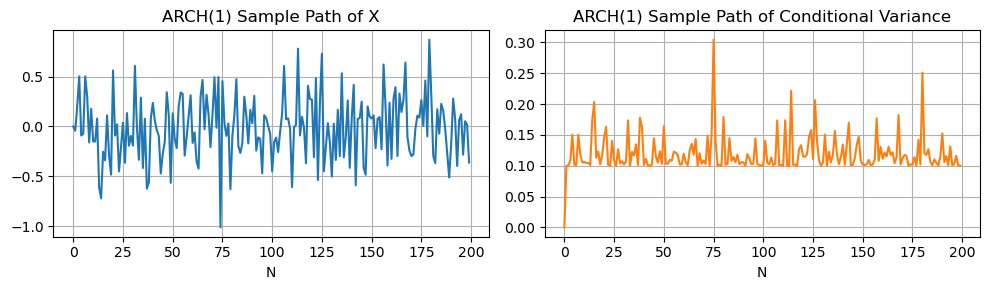

In [2]:
# Simulate a sample path from the ARCH(1) model given above
N = 200
X = np.zeros(N)
sigma_squared = np.zeros(N)
omega = 0.1
alpha_1 = 0.2
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(1, N):
    sigma_squared[t] = omega + alpha_1 * X[t-1]**2
    X[t] = np.sqrt(sigma_squared[t]) * epsilon[t]

# Plot the sample path of X and sigma_squared
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(X)
axes[0].set_title('ARCH(1) Sample Path of X')
axes[0].set_xlabel('N')
axes[0].grid(True)
axes[1].plot(sigma_squared, color='C1')
axes[1].set_title('ARCH(1) Sample Path of Conditional Variance')
axes[1].set_xlabel('N')
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 3. GARCH Models

A natural idea for extending the $\text{ARCH}$ model is to include a moving average part in the model, which is similar to the extension from an $\text{AR}$ model to an $\text{ARMA}$ model. 

A $\text{GARCH}(p, q)$ model with order $(p \geq 1, q \geq 0)$ is of the form

$$
\begin{cases}
X_t = \sigma_t \varepsilon_t \\
\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i X_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2, \tag{3.1}
\end{cases}
$$

where $\omega \geq 0, \alpha_i \geq 0, \beta_j \geq 0$, $\alpha_p > 0$, and $\beta_q > 0$ are constants, $\varepsilon_t \sim \text{iid}(0, 1)$, and $\varepsilon_t$ is independent of $\{X_k; k \leq t - 1\}$. A stochastic process $X_t$ is called a $\text{GARCH}(p, q)$ process if it satisfies equation 3.1.

In practice, it has been found that for some time series, the $\text{ARCH}(p)$ model defined by equation 2.1 will provide an adequate fit only if the order $p$ is large. By allowing past volatilities to affect the present volatility in equation 3.1, a more parsimonious model may result. That is why we need $\text{GARCH}$ models. Besides, note the condition that the order $p \geq 1$.

If $X_t$ is a $\text{GARCH}(p, q)$ process defined in equation 3.1 and $\sum_{i=1}^{p} \alpha_i + \sum_{j=1}^{q} \beta_j < 1$, then the following propositions hold.

$X_t^2$ follows the $\text{ARMA}(m, q)$ model

$$ X_t^2 = \omega + \sum_{i=1}^{m} (\alpha_i + \beta_i) X_{t-i}^2 + \eta_t - \sum_{j=1}^{q} \beta_j \eta_{t-j}, $$

where $\alpha_i = 0$ for $i > p$, $\beta_j = 0$ for $j > q$, $m = \max(p, q)$, and $\eta_t = \sigma_t^2 (\varepsilon_t^2 - 1)$.

$X_t$ is a white noise with

$$ \mathbb{E}(X_t) = 0, \quad \mathbb{E}(X_{t+h} X_t) = 0 \text{ for any } h \neq 0, \quad \text{Var}(X_t) = \frac{\omega}{1 - \sum_{i=1}^{m} (\alpha_i + \beta_i)}. $$

$\sigma_t^2$ is the conditional variance of $X_t$ , that is, we have

$$ \mathbb{E}(X_t \mid \mathcal{F}_{t-1}) = 0, \quad \sigma_t^2 = \text{Var}(X_t^2 \mid \mathcal{F}_{t-1}). $$

Although an asset return series can usually be seen as a white noise, there exists such a return series so that it may be autocorrelated. What is more, a given original time series is not necessarily a return series, and at the same time, its values may be negative. If a time series is autocorrelated, we must first build an adequate model (e.g., an $\text{ARMA}$ model) for the series in order to remove any autocorrelation in it. Then check whether the residual series has an $\text{ARCH}$ effect,
and if yes then we further model the residuals. In other words, if a time series $Y_t$ is autocorrelated and has $\text{ARCH}$ effect, then a $\text{GARCH}$ model that can capture the features of $Y_t$ should be of the form

$$
\begin{cases}
\begin{aligned}
Y_t &= f(Z_t, Y_{t-1}, X_{t-1}, Y_{t-2}, X_{t-2}, \ldots) + X_t \\
X_t &= \sigma_t \varepsilon_t \\
\sigma_t^2 &= \omega + \sum_{i=1}^{p} \alpha_i X_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2,
\end{aligned}
\end{cases}
$$

where the top part is referred to as the *mean equation (model)* and the bottom line is known as the *volatility (variance) equation (model)*, and $Z_t$ is a representative of exogenous regressors. If $Y_t$ is a return series, then typically $Y_t = r + X_t$ where $r$ is a constant that means the expected returns is fixed.

Given an $\text{GARCH}(1, 1)$ model as follows

$$
\begin{cases}
X_t = \sigma_t \varepsilon_t \\
\sigma_t^2 = 0.1 + 0.2 X_{t-1}^2 + 0.6 \sigma_{t-1}^2.
\end{cases}
$$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 200 from the $\text{GARCH}(1, 1)$ model, and then graph the time series.

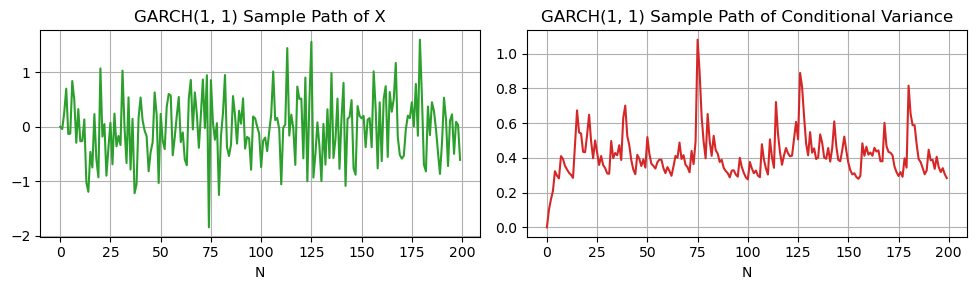

In [3]:
# Simulate a sample path from the GARCH(1, 1) model given above
N = 200
X = np.zeros(N)
sigma_squared = np.zeros(N)
omega = 0.1
alpha_1 = 0.2
beta_1 = 0.6
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(1, N):
    sigma_squared[t] = omega + alpha_1 * X[t-1]**2 + beta_1 * sigma_squared[t-1]
    X[t] = np.sqrt(sigma_squared[t]) * epsilon[t]

# Plot the sample path of X and sigma_squared
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(X, color='C2')
axes[0].set_title('GARCH(1, 1) Sample Path of X')
axes[0].set_xlabel('N')
axes[0].grid(True)
axes[1].plot(sigma_squared, color='C3')
axes[1].set_title('GARCH(1, 1) Sample Path of Conditional Variance')
axes[1].set_xlabel('N')
axes[1].grid(True)
plt.tight_layout()
plt.show()

## 4. Estimation and Testing

First of all, it is always a good idea to transform a given (asset) price series into the log return series. There are four basic steps toward estimation of a $\text{GARCH}$ model for a given time series data $Y_t$:

1. If $Y_t$ is autocorrelated, then in order to remove any autocorrelation in it, we can adopt the modeling procedures introduced in the $\text{ARMA}$ notebook to build an
appropriate mean model for the given data. At this point, the residual series $X_t$ of the mean equation should be a white noise.

2. Test whether $X_t$ has an $\text{ARCH}$ effect. If yes, continue to build an adequate volatility model for it; otherwise, stop. There are several approaches to testing for the $\text{ARCH}$ effect, for example, the squared residual series, $X_t^2$, should follow an $\text{ARMA}$ model if $X_t$ is a $\text{GARCH}$ process. Hence we can examine $X_t^2$ by its (P)ACF and the Ljung-Box testing. If $X_t^2$ is significantly autocorrelated, then $X_t$ should have an $\text{ARCH}$ effect.

3. Use volatility models to fit $X_t$ if the $\text{ARCH}$ effect is statistically significant, and so we can obtain the estimated volatility equation (model). Note that in most cases, only $\text{GARCH}$ models with lower order $(p \leq 2, q \leq 2)$ are used and fitted well.

4. Diagnostically check the fitted model and refine it if necessary. At this point, for a properly specified $\text{GARCH}$ model, the "standardized" residual series $\tilde{\varepsilon_t} = X_t / \tilde{\sigma_t}$ should be $\text{iidN}(0, 1)$. Hence we can diagnose the adequacy of a fitted $\text{GARCH}$ model by examining the series $\tilde{\varepsilon_t}$ . Note that $\tilde{\sigma_t}$ is an estimate of the conditional volatility $\sigma_t$ , not an estimate for the standard deviation of $X_t$.